In [2]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

## Scikit-Learn

In [6]:
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.grid_search import GridSearchCV
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV

## Pre-Processed Data

In [19]:
from datasets import get_data
X, X_0, Y = get_data()

In [20]:
X
#X = X.ix[:, 4:10]

,City,City Group,Type,P1,P2,P3,P4,P5,P6,P7,...,P31,P32,P33,P34,P35,P36,P37,Year,Month,Week
0,60,0,2,4,5.0,4.0,4.0,2,2,5,...,3,4,5,5,4,3,4,1999,7,28
1,4,0,1,4,5.0,4.0,4.0,1,2,5,...,0,0,0,0,0,0,0,2008,2,7
2,14,1,2,2,4.0,2.0,5.0,2,3,5,...,0,0,0,0,0,0,0,2013,3,10
3,52,1,2,6,4.5,6.0,6.0,4,4,10,...,12,10,6,18,12,12,6,2012,2,5
4,21,1,2,3,4.0,3.0,4.0,2,2,5,...,1,3,2,3,4,3,3,2009,5,19
5,4,0,1,6,6.0,4.5,7.5,8,10,10,...,0,0,0,0,0,0,0,2010,2,6
6,60,0,2,2,3.0,4.0,4.0,1,5,5,...,5,2,2,3,5,4,4,2010,10,41
7,60,0,2,4,5.0,4.0,5.0,2,3,5,...,0,0,0,0,0,0,0,2011,6,25
8,1,1,2,1,1.0,4.0,4.0,1,2,1,...,5,5,3,4,5,4,5,2010,8,34
9,16,1,2,6,4.5,6.0,7.5,6,4,10,...,0,0,0,0,0,0,0,2011,11,46


### Principle Components Analysis

In [21]:
n_components = [3, 4, 5]

pca = PCA()
logistic = LogisticRegression()
pipe = Pipeline(steps=[('pca', pca), ('logistic', logistic)])

estimator = GridSearchCV(pipe,
                         dict( \
                              pca__n_components=n_components, \
                             ))
estimator.fit(X, Y)

plt.axvline(estimator.best_estimator_.named_steps['pca'].n_components,
            linestyle=':', label='n_components chosen')
plt.legend(prop=dict(size=12))
plt.show()

ValueError: Found array with 0 sample(s) (shape=(0, 43)) while a minimum of 1 is required.

In [155]:
pca = PCA(n_components=7)
train_pca = pca.fit_transform(attr)
print pca.explained_variance_ratio_

test_pca = pca.transform(test_attr)

[ 0.49584207  0.22271101  0.17536295  0.04558604  0.01481238  0.00850373
  0.00564627]


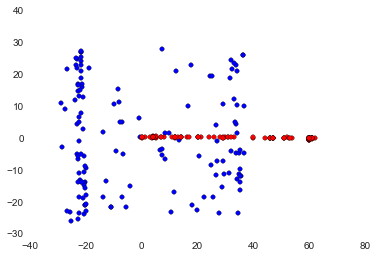

In [156]:
train_pca_0 = pca.inverse_transform(train_pca)
test_pca_0 = pca.inverse_transform(test_pca)

plt.scatter(train_pca[:, 0], train_pca[:, 1], c='b')
plt.scatter(train_pca_0[:, 0], train_pca_0[:, 1], c='r')
#plt.scatter(test_pca[:, 0], test_pca[:, 1], c='k')
#plt.scatter(test_pca_0[:, 0], test_pca_0[:, 1], c='g')

### Linear Regression and Cross Validation

In [157]:
from sklearn.cross_validation import train_test_split, KFold, StratifiedKFold
kf = KFold(len(attr), n_folds=6)
skf = StratifiedKFold(attr.ix[0])
X_train, X_test, y_train, y_test = train_test_split(train_pca, target)

In [158]:
from sklearn.svm import SVR
svr = SVR()
svr_pca = SVR()
scores = [svr.fit(attr.ix[train], target[train]).score(attr.ix[test], target[test])
          for train, test in kf]
scores_pca = [svr_pca.fit(train_pca[train], target[train]).score(train_pca[test], target[test])
          for train, test in kf_pca]

In [182]:
from sklearn.linear_model import LinearRegression, ElasticNetCV, OrthogonalMatchingPursuitCV, LarsCV
from sklearn.ensemble import ExtraTreesRegressor

etr = ExtraTreesRegressor(n_estimators=100, max_features=2)
lr = LinearRegression()
omp = OrthogonalMatchingPursuitCV()

etr.fit(train_pca, target)

predicted_train = etr.predict(X_train)
predicted_test = etr.predict(X_test)
print etr.score(X_test, y_test)

1.0


In [183]:
lcv = LarsCV()

scores1 = [lcv.fit(train_pca[train], target[train]).score(train_pca[test], target[test])
          for train, test in kf]
scores2 = [etr.fit(train_pca[train], target[train]).score(train_pca[test], target[test])
          for train, test in kf]
scores3 = [lr.fit(train_pca[train], target[train]).score(train_pca[test], target[test])
          for train, test in kf]
scores4 = [omp.fit(train_pca[train], target[train]).score(train_pca[test], target[test])
          for train, test in kf]

all_scores = [scores1, scores2, scores3, scores4]

for score_set in all_scores:
    print('avg: %s' % (sum(score_set)/len(score_set)))
    for score in score_set:
        print score
    print(' ')

avg: 0.0583999416906
0.0972373640394
-0.0749946234543
0.0187142710158
0.197897476742
0.246373934614
-0.134828772813
 
avg: -0.00830183351089
0.293189472762
0.0305411290519
-0.0194574010736
-0.468920003166
0.314554454315
-0.199718652954
 
avg: 0.0182662114512
0.0955234989982
-0.177321995666
0.0272892017528
0.181931762483
0.239004105696
-0.256829304556
 
avg: 0.0436006608563
0.174696949514
-0.174234789564
-0.025515706675
0.229559847954
0.278392415987
-0.221294752078
 


In [184]:
lcv = LarsCV()

scores1 = [lcv.fit(attr.ix[train], target[train]).score(attr.ix[test], target[test])
          for train, test in kf]
scores2 = [etr.fit(attr.ix[train], target[train]).score(attr.ix[test], target[test])
          for train, test in kf]
scores3 = [lr.fit(attr.ix[train], target[train]).score(attr.ix[test], target[test])
          for train, test in kf]
scores4 = [omp.fit(attr.ix[train], target[train]).score(attr.ix[test], target[test])
          for train, test in kf]

all_scores = [scores1, scores2, scores3, scores4]

for score_set in all_scores:
    print('avg: %s' % (sum(score_set)/len(score_set)))
    for score in score_set:
        print score
    print(' ')

avg: 0.0265097677545
0.0624747172014
-0.0709834352329
0.000372231832406
0.149703219956
0.111799234115
-0.0943073613449
 
avg: -0.232344413038
0.221493285812
-1.51124458697
0.133252263533
-0.379813806608
0.27987803961
-0.137631673608
 
avg: -2.44157358566
-1.12425188686
-5.97935052105
-3.80505498494
-0.619512936981
-0.520697508898
-2.60057367526
 
avg: -0.0648214936006
0.163096904706
-0.54956554835
-0.0808809647744
0.185888764189
0.254432869177
-0.361900986551
 


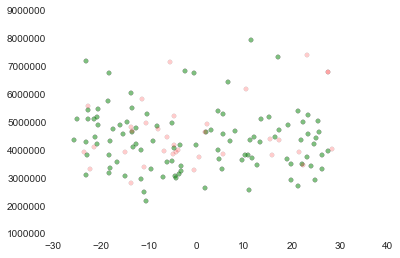

In [7]:
feature_num = 1
plt.scatter(X_train[:, feature_num], predicted_train, c='g', alpha=0.5)
plt.scatter(X_test[:, feature_num], predicted_test, c='r', alpha=0.2)

In [105]:
clf1 = LarsCV()
clf1.fit(train_pca, target)
predictions = clf1.predict(test_pca)

In [106]:
submission = pd.DataFrame({'Prediction': predictions})
submission.to_csv('submission.csv', index_label='Id')